# Repetition I

In [8]:
myName = "PeterMueller"
print('myName = "PeterMueller"')
print(myName)
print(myName[::-1])
print([x for x in myName if x in "a,e,i,o,u"])

myName = "PeterMueller"
PeterMueller
relleuMreteP
['e', 'e', 'u', 'e', 'e']


In [12]:
def funktion1(n):
    retValue = 0
    for i in range(n*n,0,-1):
        retValue += i
    return retValue

In [18]:
def funktion2(n):
    lst = []
    m = n//2
    for i in range(m):  
        lst.append(i)
        lst[i%n] += i
    return lst 

In [14]:
def funktion3(n):
    lst = []
    for i in range(1,n):
       lst.append(i)
       for j in range(1,n,10):
          lst[-1] = lst[-1]*j
    return lst

In [15]:
# please run this cell once. You will need the imports for the cells below.
import matplotlib.pyplot as plt
import numpy as np
import timeit

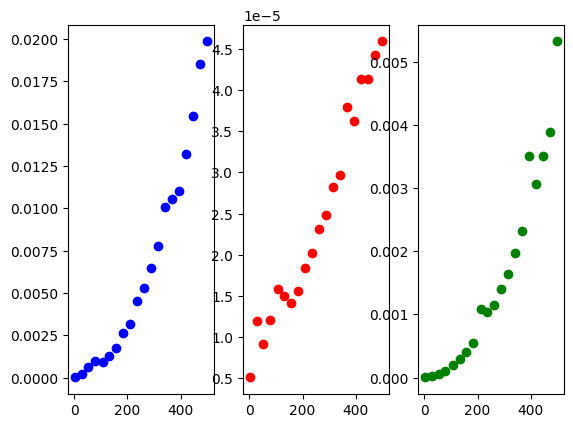

In [19]:
ns = np.linspace(1, 500, 20, dtype=int)

ts1 = [timeit.timeit(stmt=f'funktion1({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts2 = [timeit.timeit(stmt=f'funktion2({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts3 = [timeit.timeit(stmt=f'funktion3({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(ns, ts1, 'ob')
ax2.plot(ns,ts2,'or')
ax3.plot(ns,ts3,'og')

# Repetition II

In [18]:
geradeZahlen = range(2,101,2)
for i in geradeZahlen:
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100


In [9]:
class Stack:
    class Node:
        def __init__(self, val, next) -> None:
            self.value = val
            self.next = next
    
    def __init__(self) -> None:
        self.top = None
    
    def push(self, val):
        newNode = Stack.Node(val,self.top)
        self.top = newNode
    
    def pop(self):
        # returns the top value of the stack and deletes the top node
        retValue = self.top.value
        self.top = self.top.next
        return retValue
    
    def peek(self): # look at the top element of the stack
        return self.top
    
    def empty(self):
        return self.top == None
    
    def __bool__(self):
        return not self.empty()
    
    def __iter__(self):
        # iterates over the stack and returns the value of every node
        node = self.top
        while node:
            yield node.value
            node = node.next
    
    def __repr__(self) -> str:
        return '[' + ', '.join(repr(x) for x in self) + ']'


In [10]:
myStack = Stack()
for x in range(5):
    myStack.push(x)
    print(myStack)

print(myStack.empty())

while myStack:
    print(myStack.pop())

print(myStack.empty())

[0]
[1, 0]
[2, 1, 0]
[3, 2, 1, 0]
[4, 3, 2, 1, 0]
False
4
3
2
1
0
True


In [8]:
# Array Backed List
import numpy as np
class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0

    def append(self, value):
        if self.size == len(self.data): 
            ndata = np.empty(len(self.data)*2, dtype=object) 
            for i in range(len(self.data)): 
                ndata[i] = self.data[i]
            self.data = ndata             
        self.data[self.size] = value
        self.size += 1
 
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]        

    def __setitem__(self,idx,value):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value      

    def __len__(self):
        """Should return the number of elements in the ArrayList"""
        return self.size
    
    def __iter__(self):
        for i in range(self.size):
            yield self.data[i]
        
    def __repr__(self) -> str:
        return '[' + ', '.join(repr(x) for x in self) +']'

In [16]:
class ArrayList(ArrayList):
    def search(self, x):
        # Searches for x in the list, returns True if x is an element of
        # the list, otherwise False
        for i in range(self.size):
            if x == self.data[i]:
                return True
        else:
            return False
    
    def filter(self, value):
        # returns a new ArrayList, which contains only the 
        # elements > value of the original list
        newList = ArrayList()
        for el in self:
            if el > value:
                newList.append(el)
        
        return newList




In [14]:
myList = ArrayList()
for x in range(10):
    myList.append(x)

print(myList)
myList.search(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


False

In [15]:
print(myList.filter(5))

[6, 7, 8, 9]


# LinkedQueue

In [14]:
class LinkedQueue:
    class Node:
        def __init__(self,val, next=None):
            self.value = val
            self.next = next
    
    def __init__(self) -> None:
        self.head = self.tail = None

    def enqueue(self, value):
        # enqueues an element at the end of the queue
        newNode = LinkedQueue.Node(value)
        if self.tail:
            self.tail.next = newNode
            self.tail = newNode
        else:
            self.head = self.tail = newNode
    
    def dequeue(self):
        assert not self.empty()
        retValue = self.head
        self.head = self.head.next
        if self.head is None:
            self.tail = None
        
        return retValue
    
    def empty(self):
        return self.head is None

    def __bool__(self):
        return not self.empty()
    
    def __iter__(self):
        node = self.head
        while node:
            yield node.value
            node = node.next
    
    def __repr__(self) -> str:
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [15]:
import random
myQueue = LinkedQueue()
randomlist = random.sample(range(10, 30), 8)
for x in randomlist:
    myQueue.enqueue(x)

print(myQueue)

[24, 17, 29, 13, 19, 28, 22, 18]


In [34]:
class LinkedQueue(LinkedQueue):
    def mean(self):
        sum = 0
        size = 0
        node = self.head
        while node:
            sum += node.value
            size += 1
            node = node.next
        
        return sum/size

In [44]:
import random
myQueue = LinkedQueue()
randomlist = random.sample(range(-10, 30),3)
for x in randomlist:
    myQueue.enqueue(x)

print(myQueue)
print(myQueue.mean())

[-8, -9, 1]
-5.333333333333333


In [28]:
class LinkedQueue(LinkedQueue):
    def addBefore(self, value, targetNodeValue):
        assert not self.empty()

        # head value == targetNodeValue so prepend
        if self.head.value == targetNodeValue:
            newNode = LinkedQueue.Node(value, self.head)
            self.head = newNode
            return

        # check all other nodes
        node = self.head
        while node.next:
            if node.next.value == targetNodeValue:
                newNode = LinkedQueue.Node(value,node.next)
                node.next = newNode
                return
            node = node.next
        
        #if we end up here, we didn't found the targetNode so raise an Keyerror
        raise(KeyError("targetNodeValue not found"))


In [33]:
myQueue = LinkedQueue()
for x in range(4):
    myQueue.enqueue(x)

print(myQueue)
myQueue.addBefore(10,0)
print(myQueue)


[0, 1, 2, 3]


KeyError: 'targetNodeValue not found'